In [13]:
import os, glob
import pandas as pd

data_list = []

path = 'data'
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(os.path.join(os.getcwd(), filename), 'r') as file:
        for line in file.readlines():
            newline = line.strip('\n')
            data_list.append(newline)

data_list2 = data_list[:2]

for i in range(3, len(data_list), 2):
    data_list2.append(data_list[i])

data_list3 = []

for line in data_list2:
    sub_list = line.split('\t')
    data_list3.append(sub_list)

df_raw = pd.DataFrame(data_list3[1:], columns=data_list3[0])
print(df_raw)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [14]:
def MutationClass(wt_seq, mt_seq):
    
    '''Identifying mutation class
    inputs are wildtype and mutant sequences, both are strings
    output is a mutation class, string
    '''
    
    if len(wt_seq) != len(mt_seq):
        if len(wt_seq) > len(mt_seq):
            mutation = 'Deletion'
        else:
            mutation = 'Insertion'
    
    else:
        for pos in range(len(wt_seq)):
            if wt_seq[pos] != mt_seq[pos]:
                mutation = 'Substitution'
            
    return mutation

In [15]:
def MutationLoc(wt_seq, mt_seq):
    
    '''Identifying mutation location
    inputs are wildtype and mutant sequences, both are strings
    output is a mutation position (Promoter, CDS, Both), string
    '''
    
    if len(mt_seq) <= 1000:
        if mt_seq != wt_seq:
            loc = "Promoter"
    else:
        if mt_seq[:1000] != wt_seq[:1000]:
            loc = "Promoter"
        elif mt_seq[:1000] == wt_seq[:1000] and mt_seq[1000:] != wt_seq[1000:]:
            loc = "CDS"
        elif mt_seq[:1000] == wt_seq[:1000] and mt_seq[1000:] == wt_seq[1000:]:
            loc = "No mutation"
    return loc
        

In [16]:
def avg(gene, value):
    
    '''Calculate mean
    input1 is an index of gene row, int
    input2 is a name of the value (header) without ".Rep1/2/3", string
    output is mean, float
    '''
    
    if type(gene) != int:
        raise AttributeError("{} is an incorrect data format - must be int".format(type(gene)))
    elif type(value) != str:
        raise AttributeError("{} is an incorrect data format - must be str".format(type(value)))
        
    reps = []
    for rep in range(3):
        reps.append(float(df.loc[gene, value+".Rep"+str(rep+1)]))
    
    return sum(reps)/len(reps)

In [17]:
def CellViaChange(wt_cellvia, mt_cellvia):
    
    '''
    Calculate percentage of cell viability change
    inputs are cell viability of wild type and mutant, float
    output is percentage of cell viability change, float
    '''
    
    percentChange = (abs(wt_cellvia - mt_cellvia)/wt_cellvia) * 100
    
    return percentChange

In [18]:
# Identify mutation class

mut_class = []
for gene in range(len(df_raw)):
    mut_class.append(MutationClass(df_raw.loc[gene, "WildType.Sequence"], df_raw.loc[gene, "Mutant.Sequence"]))

print(mut_class)

['Substitution', 'Insertion', 'Substitution', 'Substitution', 'Insertion', 'Substitution', 'Substitution', 'Insertion', 'Insertion', 'Insertion', 'Substitution', 'Substitution', 'Substitution', 'Substitution', 'Substitution', 'Insertion', 'Insertion', 'Insertion', 'Deletion', 'Insertion', 'Insertion', 'Substitution', 'Substitution', 'Substitution', 'Insertion', 'Deletion', 'Deletion', 'Substitution', 'Deletion', 'Deletion', 'Substitution', 'Deletion', 'Insertion', 'Substitution', 'Deletion', 'Substitution', 'Deletion', 'Deletion', 'Deletion', 'Deletion', 'Substitution', 'Insertion', 'Substitution', 'Substitution', 'Deletion', 'Substitution', 'Substitution', 'Deletion', 'Deletion']


In [19]:
# Identify mutation location

mut_loc = []
for gene in range(len(df_raw)):
    mut_loc.append(MutationLoc(df_raw.loc[gene, "WildType.Sequence"], df_raw.loc[gene, "Mutant.Sequence"]))

print(mut_loc)

['Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'CDS', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter', 'Promoter']


In [21]:
# Calculate mean mRNA expression wild type

wt_mean_mRNA = []
for gene in range(len(df_raw)):
    wt_mean_mRNA.append(avg(gene, "mRNA.Expression.WT"))

print(wt_mean_mRNA)

[106104500.41802746, 400.5105851486068, 27.657171381769402, 9.95771022732623, 4.057949182286905, 2.4354714775300628, 77.14529910702257, 2.5127897199430618, 874.5565546971225, 31.008051570684938, 20.717385718214185, 25.366828047879526, 1757.1505965024628, 8.647070565284041, 80.60128286043485, 37.90931512172678, 1173.4317421179278, 30.930391617793116, 1059454.3295855909, 195.39090451245468, 3350.5800170089315, 30.274670603976563, 13.965096446357927, 165.18471052195812, 60.009924610296316, 8.10119753359337, 5010.362712154928, 103.28664973397274, 67.45984601845859, 730.6009589797786, 2.209348054946537, 5.635930987536695, 4.9048984584841335, 32.06965313925952, 38.04866605953472, 11.309631233535816, 29743.298585958746, 9.64529993085342, 42.01319350505776, 13830.139805753368, 8.31221717441372, 7.575209905022228, 13.407241320777864, 5.328858814493608, 36.49744819780901, 143.0100604388407, 297848.8893859734, 896.79046601269, 6.249324190534566]


In [22]:
# Calculate mean mRNA expression mutant

mut_mean_mRNA = []
for gene in range(len(df_raw)):
    mut_mean_mRNA.append(avg(gene, "mRNA.Expression.Mut"))

print(mut_mean_mRNA)

[106104501.50114878, 400.4838525917398, 26.928329569363996, -39.57047711670045, 3.632352909966963, 2.4978338861211, 77.51793135230538, 3.958355557502786, 874.6048407816762, 31.628202494686107, 20.803008667447234, 25.749748633721612, 1757.4136745990982, 7.966944749125272, 81.34644535425092, 41.67820973960523, 1173.9866623535804, 30.93646897584254, 1059453.5159486465, 195.4727210831439, 3351.518096696347, 29.35462008680534, 13.528281709874454, 165.73373125378342, 60.20908786782423, 8.773715072559716, 2.242457186403224e-05, 103.41012105086675, 66.76541082206843, 731.6608511372501, 3.786969029785206, 5.455475102044299, 5.997279560324348, 32.14680720672506, 37.438802307419444, 11.143246875742415, 29744.58272427523, 8.901432584634732, 42.23708472268839, 0.00016238323030736188, 8.001054858543261, 7.689960261929215, 13.26176147525968, 5.147879401358639, 36.59434671065958, 143.58440569933285, 297849.12452264363, 897.0422205695577, 5.893432069760195]


In [23]:
# Calculate mean protein expression wild type

wt_mean_protein = []
for gene in range(len(df_raw)):
    wt_mean_protein.append(avg(gene, "Protein.Expression.WT"))

print(wt_mean_protein)

[25176.666666666668, 21626.666666666668, 20556.333333333332, 21147.666666666668, 26965.333333333332, 16175.666666666666, 22752.333333333332, 35318.333333333336, 11301.333333333334, 20849.333333333332, 13846.333333333334, 28437.666666666668, 36524.333333333336, 20376.0, 30539.666666666668, 19030.333333333332, 29615.0, 23740.333333333332, 19785.666666666668, 12922.0, 32555.0, 12873.666666666666, 5061.0, 25620.0, 32568.333333333332, 22426.333333333332, 23.961962884951735, 16761.0, 45162.333333333336, 13401.0, 16793.0, 13890.333333333334, 31776.333333333332, 30995.666666666668, 27918.0, 34750.333333333336, 28294.0, 30209.666666666668, 36049.0, 896.5250415815062, 27010.0, 19562.333333333332, 38110.0, 32860.666666666664, 32755.333333333332, 40979.666666666664, 25594.333333333332, 28191.0, 32103.0]


In [24]:
# Calculate mean protein expression mutant

mut_mean_protein = []
for gene in range(len(df_raw)):
    mut_mean_protein.append(avg(gene, "Protein.Expression.Mut"))

print(mut_mean_protein)

[25184.0, 21637.666666666668, 20565.333333333332, 10071.333333333334, 26974.0, 16183.0, 22765.666666666668, 55350.0, 11314.333333333334, 20864.0, 13859.666666666666, 28449.666666666668, 36537.666666666664, 20384.666666666668, 30548.333333333332, 36188.666666666664, 29624.0, 23746.333333333332, 19795.0, 12928.666666666666, 32560.666666666668, 12884.0, 5069.0, 25633.0, 32580.333333333332, 22439.666666666668, 0.00019085646267003023, 16774.666666666668, 45173.0, 13413.333333333334, 16800.0, 13902.333333333334, 31790.333333333332, 31005.0, 27929.0, 34758.666666666664, 28303.333333333332, 13595.666666666666, 36054.666666666664, 0.00014156287451357646, 27014.666666666668, 19574.666666666668, 38117.666666666664, 32869.0, 32765.0, 40987.333333333336, 25604.333333333332, 28202.0, 32113.666666666668]


In [25]:
# Calculate mean cell viability wild type

wt_mean_cellvia = []
for gene in range(len(df_raw)):
    wt_mean_cellvia.append(avg(gene, "CellViability.WT"))

print(wt_mean_cellvia)

[0.5404628684626746, 0.2536865071117612, 0.13653389704923014, 0.5224736180322739, 0.31619396721420695, 0.4333177020700288, 0.5351149524910533, 0.642143052064713, 0.2448625305012059, 0.44639295350771957, 0.7656969645431052, 0.7029357332329719, 0.8421721588186045, 0.7895585905583561, 0.5805306391826647, 0.30420281355212225, 0.4981842268585761, 0.5452422046582086, 0.23295144717238883, 0.5578758974904469, 0.2532918372270395, 0.6701507750005681, 0.17960303821272047, 0.45990873300681084, 0.6741499177478305, 0.46317117977350336, 0.5343421468934252, 0.4823680233383471, 0.37812896460943984, 0.5674063357195821, 0.6838461421005161, 0.44095974065276566, 0.9335950326521386, 0.6148691843170538, 0.7136096962552257, 0.5744683791417466, 0.3818085675586995, 0.30031825421437025, 0.37528028016175813, 0.3839281258011531, 0.704167584307749, 0.7022784073558245, 0.3139323939647461, 0.2767387869590483, 0.6375476322388943, 0.669243388800428, 0.5984957401150003, 0.7836091970326166, 0.44298414443613754]


In [26]:
# Calculate mean cell viability mutant

mut_mean_cellvia = []
for gene in range(len(df_raw)):
    mut_mean_cellvia.append(avg(gene, "CellViability.Mut"))

print(mut_mean_cellvia)

[0.5996500509230077, 0.23179033013238823, 0.15304424747974, 0.0, 0.22086409775822377, 0.3557842045740855, 0.5851667054911353, 5.8578536789059195, 0.30782659075518265, 0.3082370350165479, 0.6746735192902523, 0.7757471989996437, 0.8627529112431986, 0.8306113341842724, 0.7514254878568241, 0.0, 0.483841816625489, 0.6809831114674195, 0.36557214072151223, 0.6667452452774469, 0.290153432212572, 0.6689847602386391, 0.07067803378880834, 0.4855374454922015, 0.6965975986934302, 0.4508908518528016, 5.048818695660605, 0.4488735701428846, 0.42446567507676763, 0.5851262786921826, 0.6905716759395828, 0.3948413419562112, 0.8931700785127278, 0.5465653310929982, 0.6847811368105546, 0.5893613241904836, 0.3020875152939013, 4.737217021441072, 0.3682975719045154, 0.0, 0.7950298705858004, 0.7070399761147949, 0.2520186059029845, 0.27279466776112066, 0.6522037825957622, 0.677356642569282, 0.5828791568527686, 0.7712403766849224, 0.375434806322996]


In [31]:
# Create summary table

# Create the first column = gene name
gene_list = [["Gene"]]
for gene in range(len(df_raw)):
    gene_list.append([df_raw.loc[gene, "Gene"]])
    
df_summary = pd.DataFrame(gene_list[1:], columns=gene_list[0])

# Add other columns
df_summary.insert(1, "Mutation Class", mut_class, True)
df_summary.insert(2, "Mutation Location", mut_loc, True)
df_summary.insert(3, "mRNA.Expression.WT.Mean", wt_mean_mRNA, True)
df_summary.insert(4, "mRNA.Expression.Mut.Mean", mut_mean_mRNA, True)
df_summary.insert(5, "Protein.Expression.WT.Mean", wt_mean_protein, True)
df_summary.insert(6, "Protein.Expression.Mut.Mean", mut_mean_protein, True)
df_summary.insert(7, "CellViability.WT.Mean", wt_mean_cellvia, True)
df_summary.insert(8, "CellViability.Mut.Mean", mut_mean_cellvia, True)



print(df_summary)

        Gene Mutation Class Mutation Location  mRNA.Expression.WT.Mean  \
0        Ah3   Substitution          Promoter             1.061045e+08   
1     Alli2r      Insertion          Promoter             4.005106e+02   
2      Alli8   Substitution          Promoter             2.765717e+01   
3    Anap7c1   Substitution          Promoter             9.957710e+00   
4     App1l8      Insertion          Promoter             4.057949e+00   
5       App8   Substitution          Promoter             2.435471e+00   
6    Avon1a5   Substitution          Promoter             7.714530e+01   
7      Avon4      Insertion          Promoter             2.512790e+00   
8     Ben3l6      Insertion          Promoter             8.745566e+02   
9       Bma9      Insertion          Promoter             3.100805e+01   
10  Cairn1b8   Substitution          Promoter             2.071739e+01   
11  Cairn3a2   Substitution          Promoter             2.536683e+01   
12    Cairn6   Substitution          P

In [32]:
import matplotlib.pyplot as plt
import seaborn as sbn

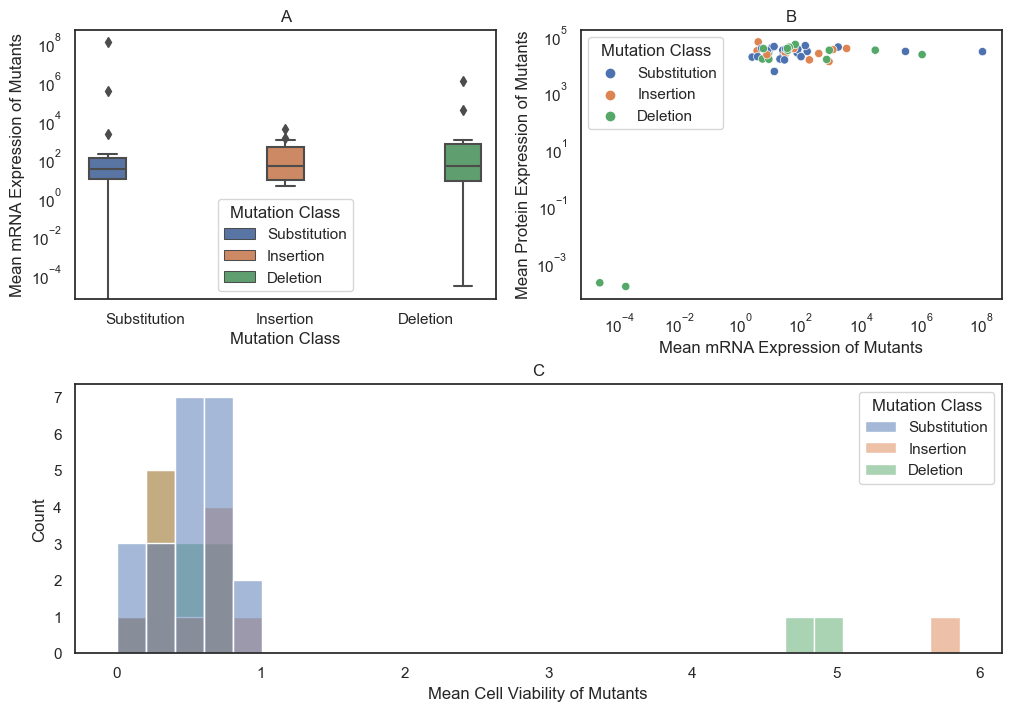

In [35]:
# Plot effects of mutation class graphs

fig, ax = plt.subplot_mosaic([["box", "scatter"],["hist", "hist"]], 
                             figsize=(10, 7), layout="constrained")
sbn.set(font_scale=1)
sbn.set_style(style='white')

# boxplot
sbn.boxplot(df_summary, x="Mutation Class", y="mRNA.Expression.Mut.Mean", hue="Mutation Class", ax=ax["box"])
ax["box"].set_yscale("log")
ax["box"].set_ylabel("Mean mRNA Expression of Mutants")
ax["box"].set_title("A")

# scatter plot
sbn.scatterplot(df_summary, x="mRNA.Expression.Mut.Mean", y="Protein.Expression.Mut.Mean", hue="Mutation Class", ax=ax["scatter"])
ax["scatter"].set_yscale("log")
ax["scatter"].set_xscale("log")
ax["scatter"].set_ylabel("Mean Protein Expression of Mutants")
ax["scatter"].set_xlabel("Mean mRNA Expression of Mutants")
ax["scatter"].set_title("B")

# histogram
sbn.histplot(df_summary, x="CellViability.Mut.Mean", hue="Mutation Class", ax=ax["hist"])
ax["hist"].set_xlabel("Mean Cell Viability of Mutants")
ax["hist"].set_title("C")
plt.show()

In [36]:
# Calculate cell viability change

cellvia_change = []
for gene in range(len(df_raw)):
    cellvia_change.append(CellViaChange(df_summary.loc[gene, "CellViability.WT.Mean"], df_summary.loc[gene, "CellViability.Mut.Mean"]))

print(cellvia_change)

[10.951202370051579, 8.631194945550122, 12.092491892000055, 100.0, 30.149174032596754, 17.892991014572733, 9.353458124666911, 812.2350012307825, 25.71404458048213, 30.949395012970893, 11.887659148181028, 10.358196677780809, 2.4437702207425986, 5.199455001418551, 29.437696676055563, 100.0, 2.878937039722584, 24.895524530112574, 56.930615868199084, 19.51497605054077, 14.553013389251623, 0.17399289912453275, 60.647640211354435, 5.572564869084825, 3.3297758190925655, 2.651358386915829, 844.8662668691929, 6.943754887327704, 12.25420816815444, 3.1229723492826595, 0.9834864050571992, 10.458641559495673, 4.330030979767791, 11.108680507370352, 4.039821711497659, 2.5924742926646283, 20.87984897105323, 1477.3989609235002, 1.8606648487453044, 100.0, 12.903503129496668, 0.6780172520038522, 19.72201316335464, 1.425213733596112, 2.298832215155348, 1.212302415627356, 2.6093056667756716, 1.5784424678184732, 15.248703359151438]


In [37]:
# Add cell viability change into summary table

df_summary.insert(9, "Cell Viability Change", cellvia_change, True)

print(df_summary)

        Gene Mutation Class Mutation Location  mRNA.Expression.WT.Mean  \
0        Ah3   Substitution          Promoter             1.061045e+08   
1     Alli2r      Insertion          Promoter             4.005106e+02   
2      Alli8   Substitution          Promoter             2.765717e+01   
3    Anap7c1   Substitution          Promoter             9.957710e+00   
4     App1l8      Insertion          Promoter             4.057949e+00   
5       App8   Substitution          Promoter             2.435471e+00   
6    Avon1a5   Substitution          Promoter             7.714530e+01   
7      Avon4      Insertion          Promoter             2.512790e+00   
8     Ben3l6      Insertion          Promoter             8.745566e+02   
9       Bma9      Insertion          Promoter             3.100805e+01   
10  Cairn1b8   Substitution          Promoter             2.071739e+01   
11  Cairn3a2   Substitution          Promoter             2.536683e+01   
12    Cairn6   Substitution          P

In [39]:
# Top 5 Mutants (Gene Of Interest)

GOI = [3, 7, 26, 37, 39]

In [38]:
# make data frame for heatmap

heat_list = [["Gene", "Genotype", "mRNA Expression", "Protein Expression"]]

for gene in range(len(df_summary)):
    sublist = [df_summary.loc[gene, "Gene"], "Wild Type", float(df_summary.loc[gene, "mRNA.Expression.WT.Mean"]), float(df_summary.loc[gene, "Protein.Expression.WT.Mean"])]
    heat_list.append(sublist)
    sublist = [df_summary.loc[gene, "Gene"], "Mutant", float(df_summary.loc[gene, "mRNA.Expression.Mut.Mean"]), float(df_summary.loc[gene, "Protein.Expression.Mut.Mean"])]
    heat_list.append(sublist)

print(heat_list)


df_rnaP = pd.DataFrame(heat_list[1:], columns=heat_list[0])
print(df_rnaP)

[['Gene', 'Genotype', 'mRNA Expression', 'Protein Expression'], ['Ah3', 'Wild Type', 106104500.41802746, 25176.666666666668], ['Ah3', 'Mutant', 106104501.50114878, 25184.0], ['Alli2r', 'Wild Type', 400.5105851486068, 21626.666666666668], ['Alli2r', 'Mutant', 400.4838525917398, 21637.666666666668], ['Alli8', 'Wild Type', 27.657171381769402, 20556.333333333332], ['Alli8', 'Mutant', 26.928329569363996, 20565.333333333332], ['Anap7c1', 'Wild Type', 9.95771022732623, 21147.666666666668], ['Anap7c1', 'Mutant', -39.57047711670045, 10071.333333333334], ['App1l8', 'Wild Type', 4.057949182286905, 26965.333333333332], ['App1l8', 'Mutant', 3.632352909966963, 26974.0], ['App8', 'Wild Type', 2.4354714775300628, 16175.666666666666], ['App8', 'Mutant', 2.4978338861211, 16183.0], ['Avon1a5', 'Wild Type', 77.14529910702257, 22752.333333333332], ['Avon1a5', 'Mutant', 77.51793135230538, 22765.666666666668], ['Avon4', 'Wild Type', 2.5127897199430618, 35318.333333333336], ['Avon4', 'Mutant', 3.9583555575027

In [40]:
# Retrieve GOI data from heatmap data frame

GOI_2 = [i*2 for i in GOI]
for i in GOI:
    GOI_2.append(i*2+1)

print(GOI_2)

print(df_rnaP.iloc[GOI_2])

[6, 14, 52, 74, 78, 7, 15, 53, 75, 79]
       Gene   Genotype  mRNA Expression  Protein Expression
6   Anap7c1  Wild Type         9.957710        21147.666667
14    Avon4  Wild Type         2.512790        35318.333333
52   Ist9a2  Wild Type      5010.362712           23.961963
74  Nect1c1  Wild Type         9.645300        30209.666667
78   Oyu3a9  Wild Type     13830.139806          896.525042
7   Anap7c1     Mutant       -39.570477        10071.333333
15    Avon4     Mutant         3.958356        55350.000000
53   Ist9a2     Mutant         0.000022            0.000191
75  Nect1c1     Mutant         8.901433        13595.666667
79   Oyu3a9     Mutant         0.000162            0.000142


In [43]:
min([rnaX for rnaX in df_rnaP.loc[:, "mRNA Expression"]])

-39.57047711670045

In [44]:
max([rnaX for rnaX in df_rnaP.loc[:, "mRNA Expression"]])

106104501.50114878

In [45]:
min([pX for pX in [df_rnaP.loc[gene, "Protein Expression"] for gene in GOI_2]])

0.00014156287451357646

In [46]:
max([pX for pX in [df_rnaP.loc[gene, "Protein Expression"] for gene in GOI_2]])

55350.0

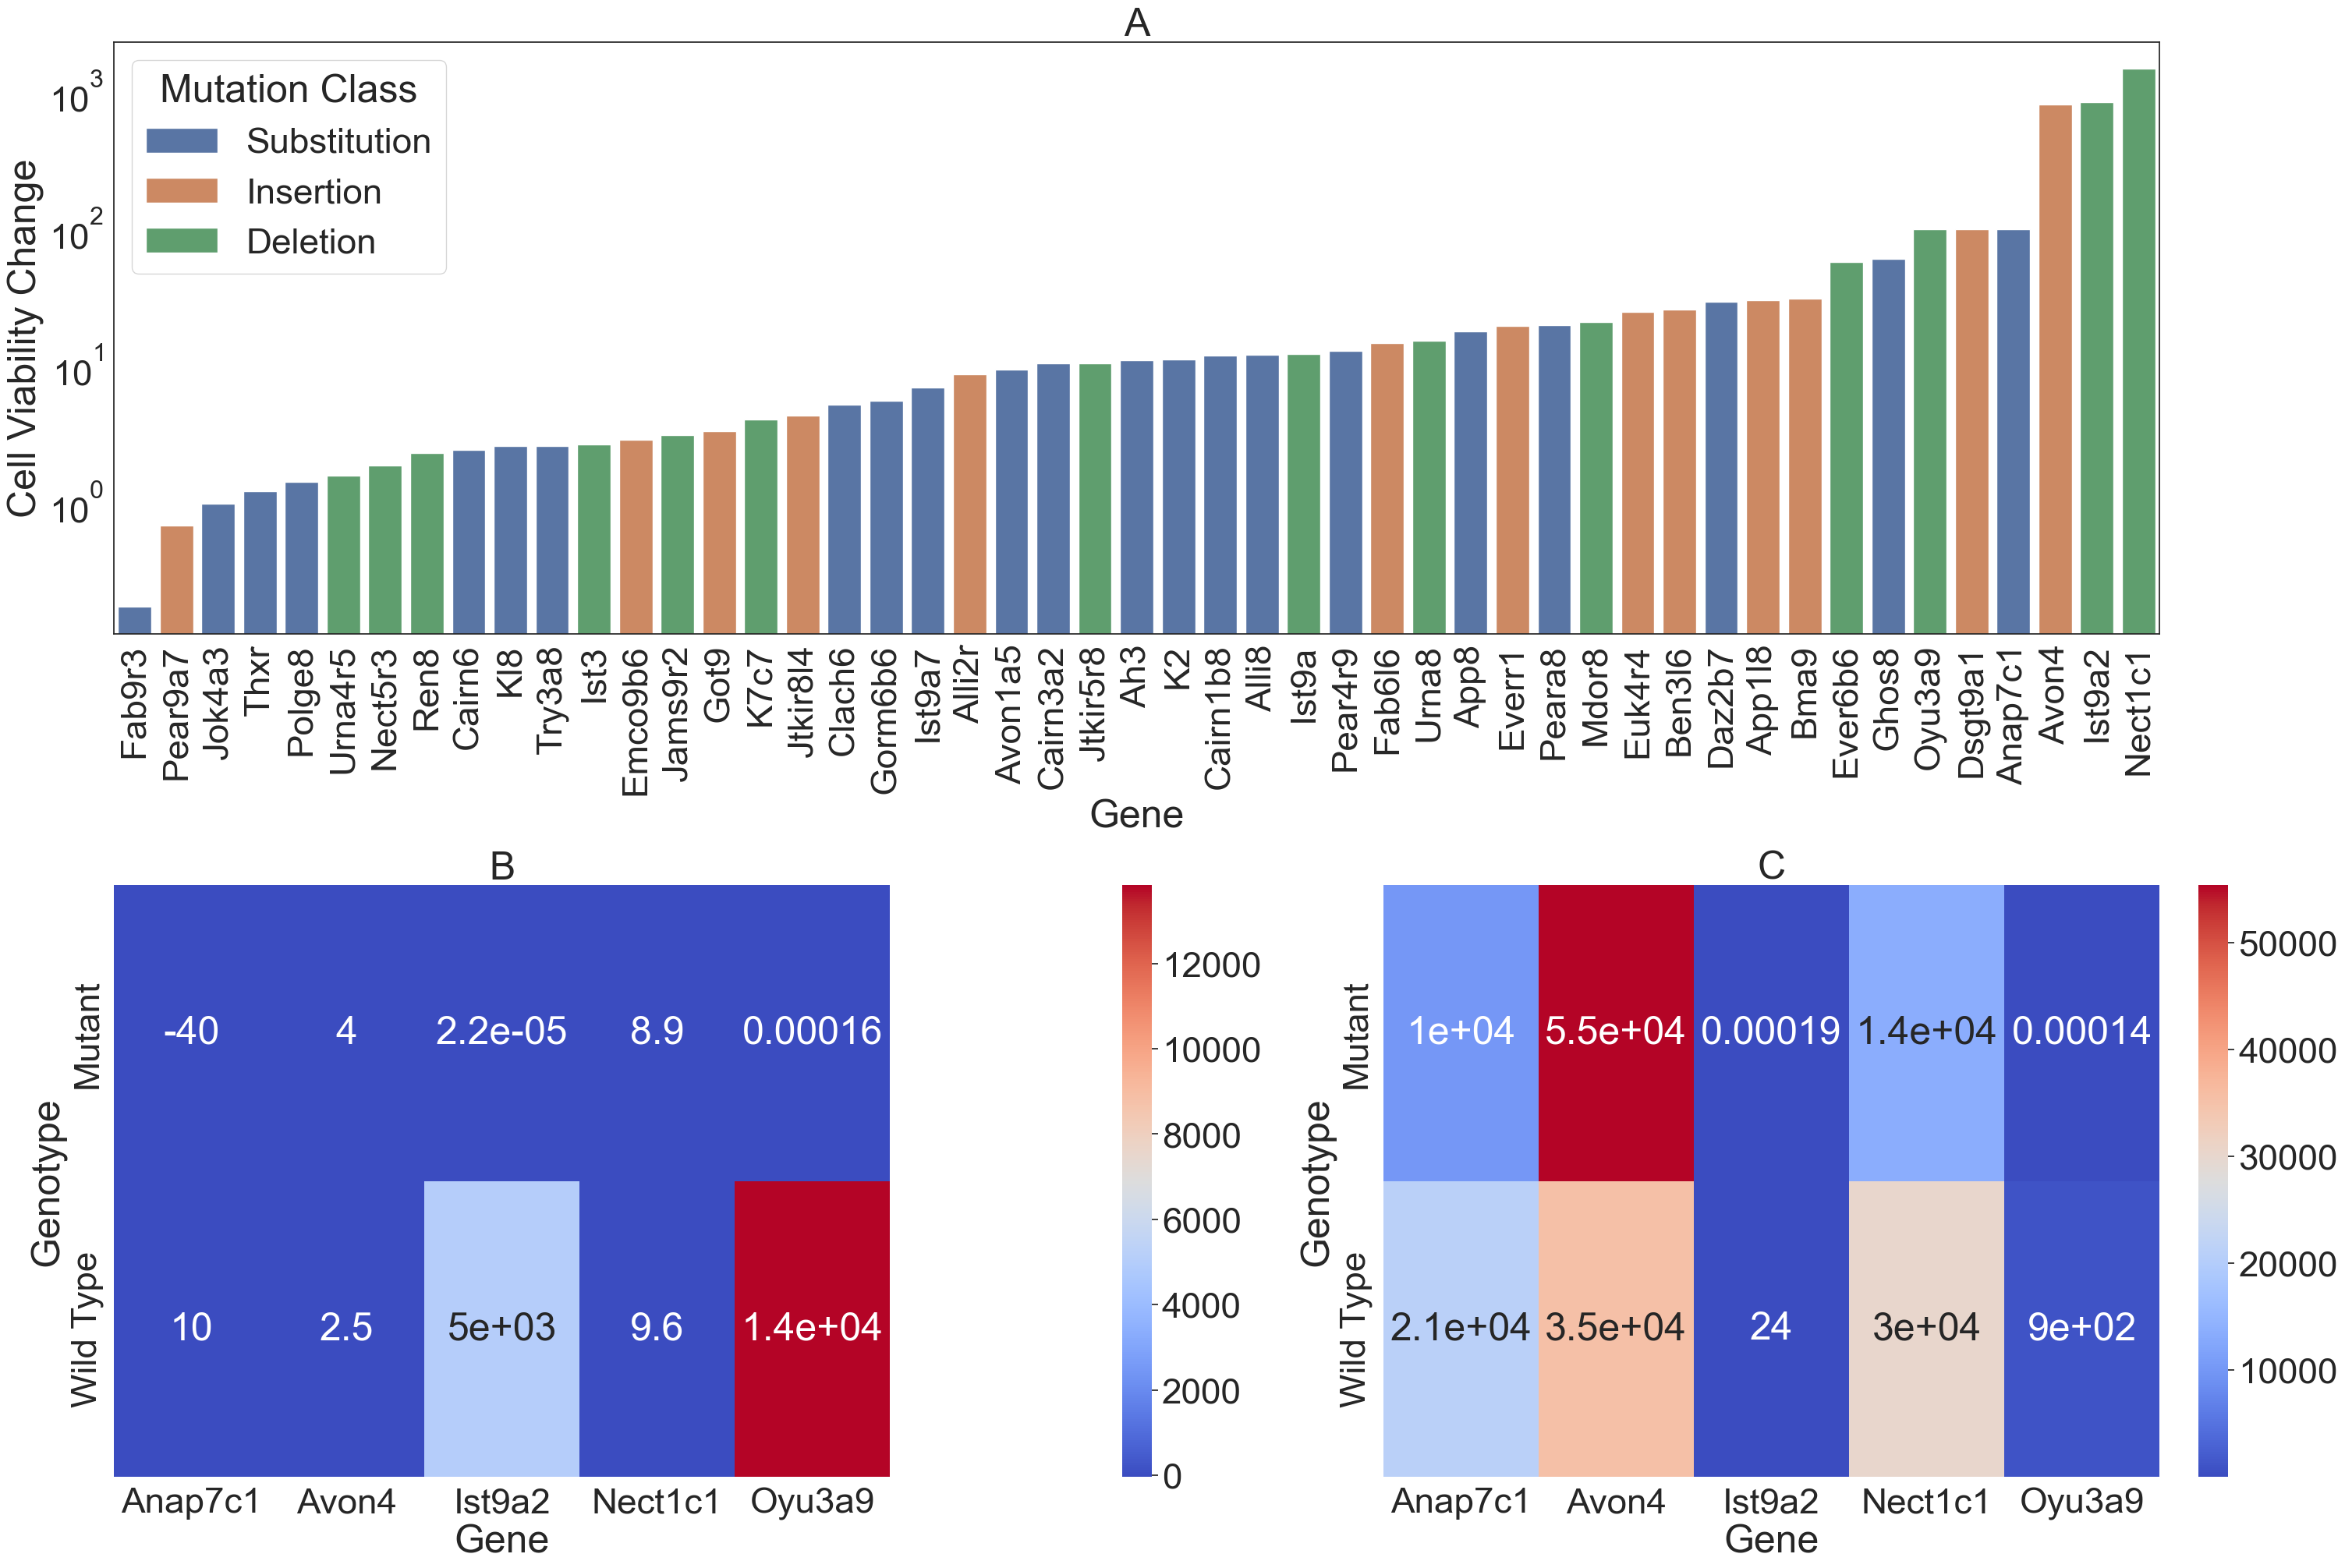

In [42]:
# Plot prioritisation analysis graphs

fig, ax = plt.subplot_mosaic([["bar", "bar"],["mRNA", "protein"]], 
                             figsize=(30, 20), layout="constrained")

sbn.set(font_scale=3)
sbn.set_style(style='white') 

# sort df by Cell Viability Change column
df_summary_cellviaSort = df_summary.sort_values(['Cell Viability Change']).reset_index(drop=True)


# bar chart
sbn.barplot(data=df_summary_cellviaSort, x="Gene", y="Cell Viability Change", hue="Mutation Class", dodge=False, ax=ax["bar"])
ax["bar"].set_title("A")
ax["bar"].set_xticklabels(ax["bar"].get_xticklabels(), rotation=90)
ax["bar"].set_yscale("log")


# mRNA heatmap
heat_mRNA_GOI = df_rnaP.iloc[GOI_2].pivot(index="Genotype", columns="Gene", values="mRNA Expression")
sbn.heatmap(heat_mRNA_GOI, vmin=-39.57047711670045, vmax=13830.139805753368, annot=True, cmap="coolwarm", ax=ax["mRNA"])
ax["mRNA"].set_title("B")

# make a protein heatmap
heat_P_GOI = df_rnaP.iloc[GOI_2].pivot(index="Genotype", columns="Gene", values="Protein Expression")
sbn.heatmap(heat_P_GOI, vmin=0.00014156287451357646, vmax=55350.0, annot=True, cmap="coolwarm", ax=ax["protein"])
ax["protein"].set_title("C")


plt.show()